# **Final Project**

# **Dataset**

In [1]:
import os
train_covid_masks = os.path.join('/content/drive/MyDrive/people_with_masks/masks')
train_covid_nomasks = os.path.join('/content/drive/MyDrive/people_with_masks/images')

In [2]:
covid_mask_names = os.listdir(train_covid_masks)
covid_nomask_names = os.listdir(train_covid_nomasks)
print(covid_mask_names[:10])
print(covid_nomask_names[:10])

['220.jpg', '215.jpg', '210.jpg', '213.jpg', '212.jpeg', '209.jpg', '216.jpg', '208.jpg', '218.jpg', '214.jpg']
['n23.jpg', 'n15.jpg', 'n20.jpg', 'n17.jpg', 'n12.jpg', 'n14.jpg', 'n26.jpg', 'n13.jpg', 'n28.jpg', 'n34.jpg']


# **Size of Dataset**

In [3]:
print("Total images in the training are", len(covid_mask_names))
print("Total images in the training are", len(covid_nomask_names))


Total images in the training are 100
Total images in the training are 100


# **Configuring the size of images**

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

#Index for iterating over images
pic_index = 0


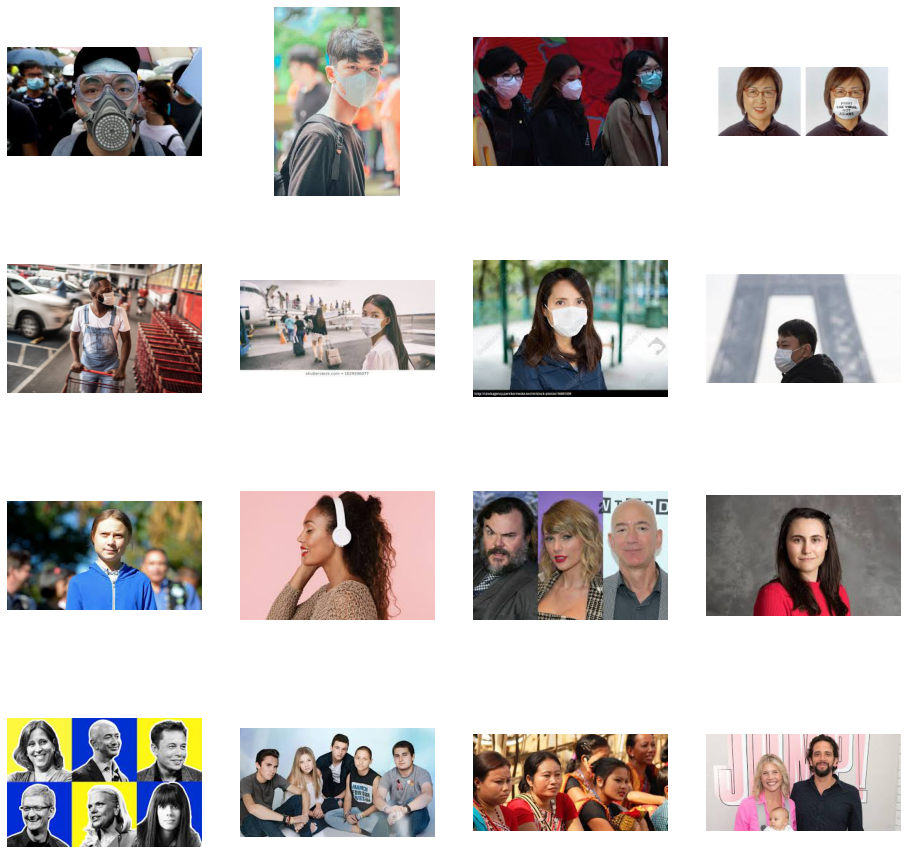

In [5]:
#Set up matplotlib fig. and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index +=8
next_maskedPerson_pix = [os.path.join(train_covid_masks, fname) for fname in covid_mask_names[pic_index-8:pic_index]]
next_nomaskedPerson_pix = [os.path.join(train_covid_nomasks, fname) for fname in covid_nomask_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_maskedPerson_pix+next_nomaskedPerson_pix):
  #Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')#Dont show axes(or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# **Building CNN**

In [6]:
import tensorflow as tf


# **Creating the CNN**

In [7]:
model = tf.keras.models.Sequential([
                                    
               #1st convolutional layer                     
               tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape= (300, 300, 3)),
               tf.keras.layers.MaxPooling2D(2,2),

               #2nd Convolution Layer
               tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
               tf.keras.layers.MaxPooling2D(2,2),

               #3rd Convolution Layer
               tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
               tf.keras.layers.MaxPooling2D(2,2),

               #Flattening
               tf.keras.layers.Flatten(),

               #Hidden Layers
               tf.keras.layers.Dense(512, activation='relu'),

               #output layer, 1-0
               tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])

# **Summary of our CNN model**

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

# **Optimizer and Loss function**

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr= 0.001), metrics=['accuracy'])


# **Preprocessing the Dataset**

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1/255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/people_with_masks',
    target_size = (300, 300),
    batch_size = 10,
    class_mode = 'binary')

Found 200 images belonging to 2 classes.


# **Training our CNN**

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch = 16,
    epochs = 20,
    verbose = 1
)

Epoch 1/20
16/16 [==============================] - 81s 5s/step - loss: 6.2805 - accuracy: 0.4557
Epoch 2/20
16/16 [==============================] - 22s 1s/step - loss: 0.6756 - accuracy: 0.6496
Epoch 3/20
16/16 [==============================] - 17s 1s/step - loss: 0.7555 - accuracy: 0.8337
Epoch 4/20
16/16 [==============================] - 17s 1s/step - loss: 0.5280 - accuracy: 0.8104
Epoch 5/20
16/16 [==============================] - 17s 1s/step - loss: 0.4059 - accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 17s 1s/step - loss: 0.3166 - accuracy: 0.8770
Epoch 7/20
16/16 [==============================] - 17s 1s/step - loss: 0.4031 - accuracy: 0.8469
Epoch 8/20
16/16 [==============================] - 17s 1s/step - loss: 0.0724 - accuracy: 0.9925
Epoch 9/20
16/16 [==============================] - 17s 1s/step - loss: 0.0472 - accuracy: 0.9856
Epoch 10/20
16/16 [==============================] - 17s 1s/step - loss: 0.0066 - accuracy: 1.0000
Epoch 11/20
16/16 [

# **Testing of CNN**

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  #predict images
  path = '/content/'+fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + 'is wearing a mask')
  else:
    print(fn + 'is not wearing a mask')
    

In [ ]:
pip install cv2